# TP3

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<h2> Example 1 </h2>

In [34]:
# Data loading
df = pd.read_csv('grav.csv')
df.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [35]:
#selection de la première colonne de notre dataset (height)
X = df.iloc[0:len(df),0]
#selection de deuxième colonnes de notre dataset (seconds squared)
Y = df.iloc[0:len(df),1] 

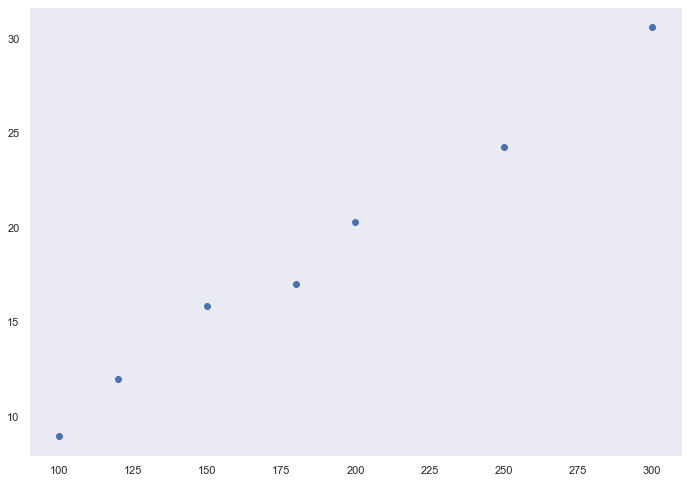

In [36]:
axes = plt.axes()
#dessiner une grille
axes.grid()  
#X et Y sont les variables qu'on a extraite dans le partie précédente
plt.scatter(X,Y) 
plt.show()

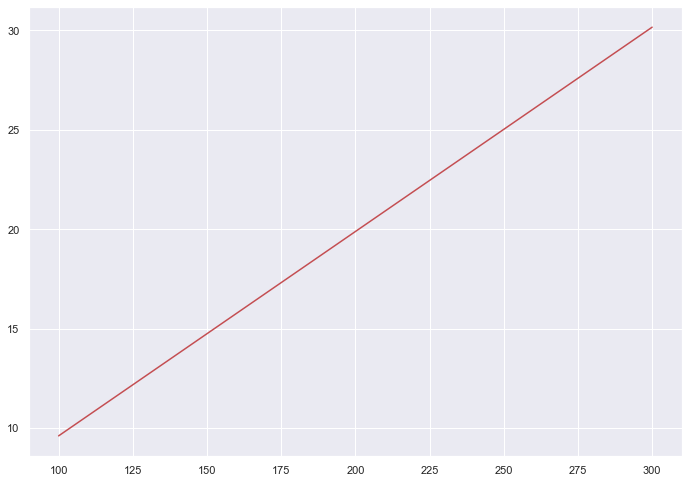

In [37]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interesse particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

In [38]:
print (slope)

0.10280912511759172


In [39]:
print (intercept)

-0.6801232361241745


<h2> Example 2 </h2>

In [40]:
!pip install pyreadstat

In [41]:
import pyreadstat
df, metadata = pyreadstat.read_sav("test_scores.sav")
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
5,ANKYI,1.0,2.0,6OL,0.0,20.0,7YZO8,1.0,2.0,66.0,74.0
6,ANKYI,1.0,2.0,6OL,0.0,20.0,9KMZD,0.0,2.0,63.0,75.0
7,ANKYI,1.0,2.0,6OL,0.0,20.0,9USQK,1.0,2.0,63.0,72.0
8,ANKYI,1.0,2.0,6OL,0.0,20.0,CS5QP,0.0,2.0,64.0,77.0
9,ANKYI,1.0,2.0,6OL,0.0,20.0,D6HT8,1.0,2.0,61.0,72.0


In [42]:
# Shape of our dataset
df.shape

# Info our dataset
df.info()

# Describe our dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


C:\Users\sirine\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


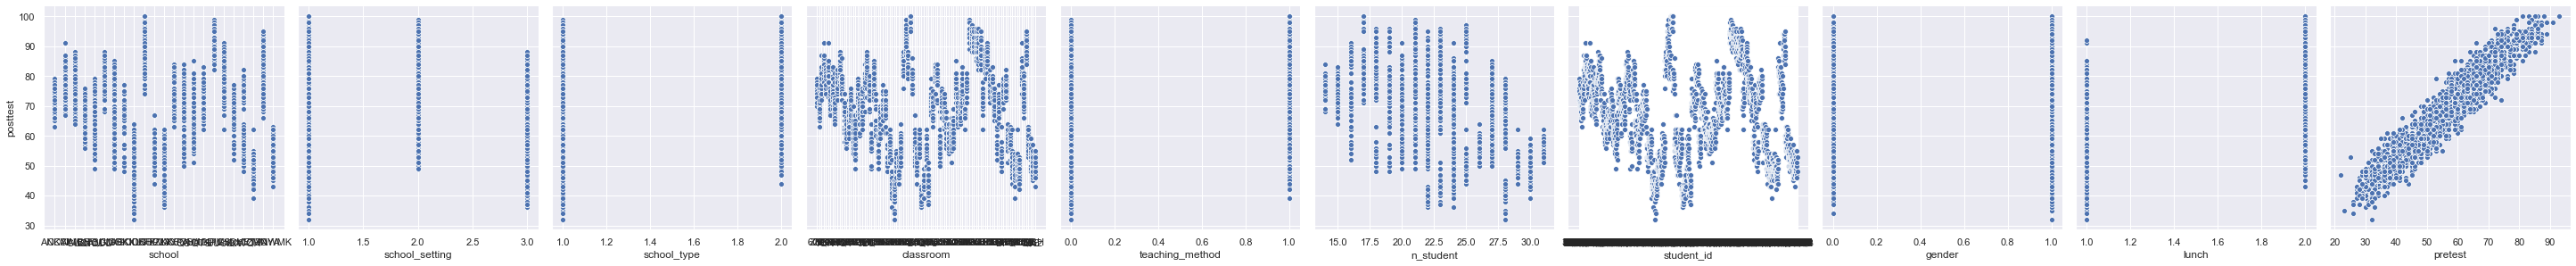

In [43]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['school','school_setting','school_type','classroom','teaching_method','n_student','student_id','gender', 'lunch','pretest'], 
             y_vars='posttest', size=4, aspect=1, kind='scatter')
plt.show()

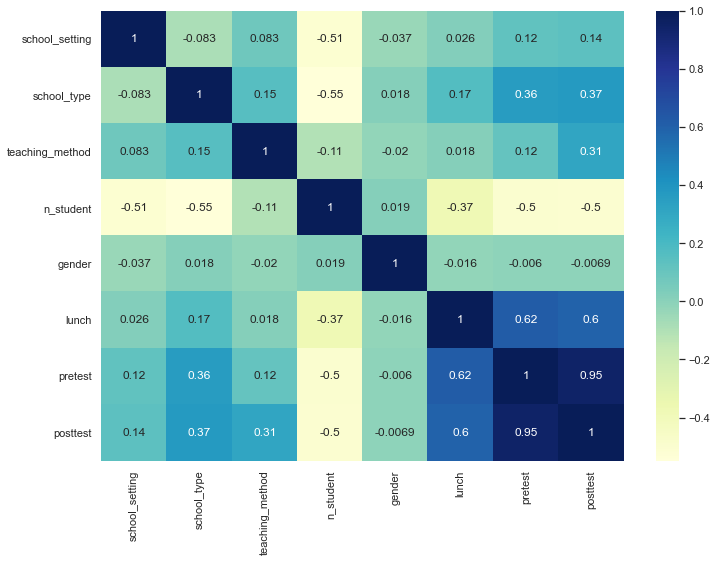

In [44]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Text(0, 0.5, 'posttest')

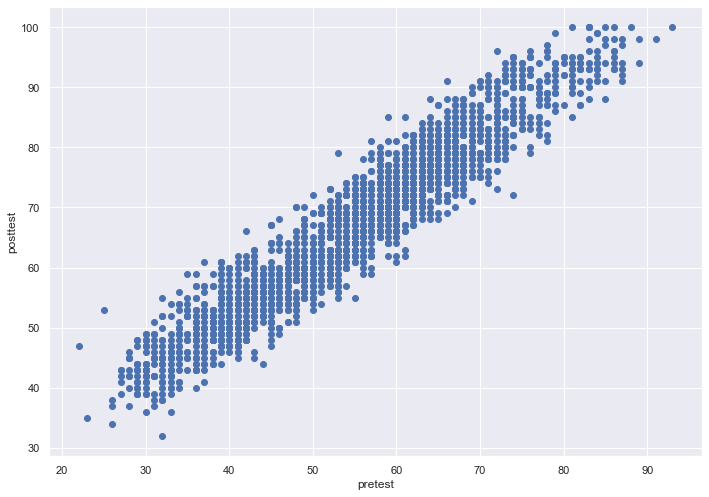

In [45]:
# Creating X and y
X = df['pretest']
y = df['posttest']
plt.scatter(X,y)
plt.xlabel("pretest")
plt.ylabel("posttest")

In [9]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

NameError: name 'y' is not defined

In [10]:
# Take a look at the train dataset
X_train
y_train

NameError: name 'X_train' is not defined

In [11]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

NameError: name 'X_train' is not defined

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

In [12]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 13.3750 + 0.9783*X_train, 'r')
plt.show()

NameError: name 'X_train' is not defined

In [13]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

NameError: name 'lr' is not defined

In [14]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

NameError: name 'res' is not defined

<Figure size 432x288 with 0 Axes>

In [15]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

NameError: name 'X_train' is not defined

In [16]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

NameError: name 'X_test' is not defined

In [17]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

NameError: name 'y_test' is not defined

In [18]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

NameError: name 'X_test' is not defined

In [19]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


NameError: name 'y' is not defined

In [20]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

NameError: name 'X_train_lm' is not defined

In [21]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

NameError: name 'X_train_lm' is not defined

In [22]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [23]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

NameError: name 'X_train_lm' is not defined

<h2> Example 3 </h2>

In [24]:
#loading the data
boston = pd.read_csv('housing.data.txt' , sep=",")
print("housing's shape : ", boston.shape)
#print the first 10 rows of the data
boston.head(10)

housing's shape :  (506, 14)


,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


<h3> Data preprocessing </h3>

> After loading the data, we can check if there are any missing values in the data. We count the number of missing values for each feature using isnull().

In [25]:
boston.isnull().sum()

CIRM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<h3> Data Analysis </h3>

> Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

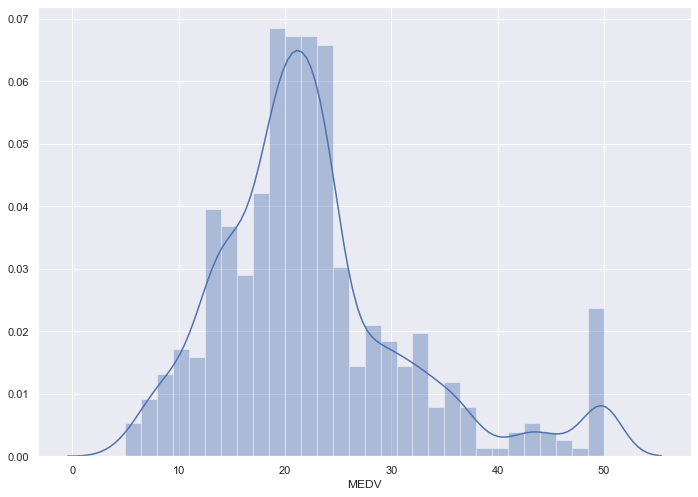

In [26]:
#plot the distribution of the target variable MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<h4> Observations: </h4>

>> We see that the values of MEDV are distributed normally with few outliers.

> Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

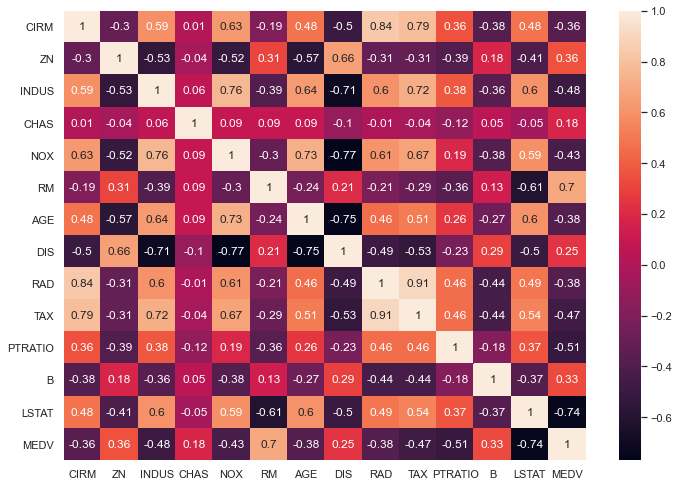

In [27]:
correlation_matrix = boston.corr().round(2)
#annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

> The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

<h4> Observations: </h4>

>> To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

>> An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

> Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

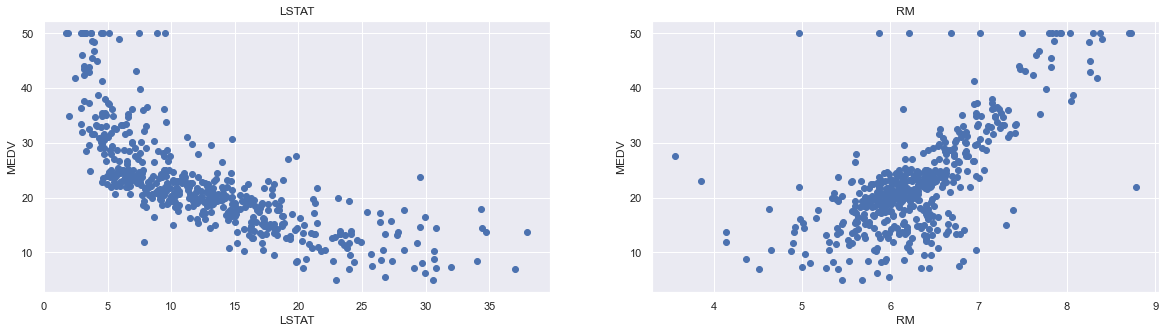

In [28]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

<h4> Observations: </h4>

>> The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

<h3> Preparing the data for training the model </h3>

> We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [29]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

<h3> Splitting the data into training and testing sets </h3>

> Next, we split the data into training and testing sets. We train the model with 70% of the samples and test with the remaining 30%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


<h3> Training and testing the model </h3>

> We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

<h3> Model evaluation </h3>

> We will evaluate our model using RMSE and R2-score.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.291267334085863
R2 score is 0.6493177656003104


The model performance for testing set
--------------------------------------
RMSE is 6.041044703455955
R2 score is 0.6162026947666575
